<a href="https://colab.research.google.com/github/HungVLe/CMPE255/blob/main/Dimensionality_reduction_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dimensionality Reduction Techniques**

#**Image dataset**

## **PCA** vs **SVD**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
!pip install opencv-python
import cv2
import matplotlib.image as mpimg

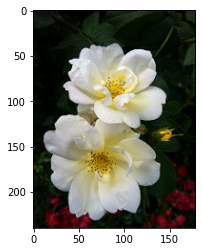

In [2]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(240, 179, 3)

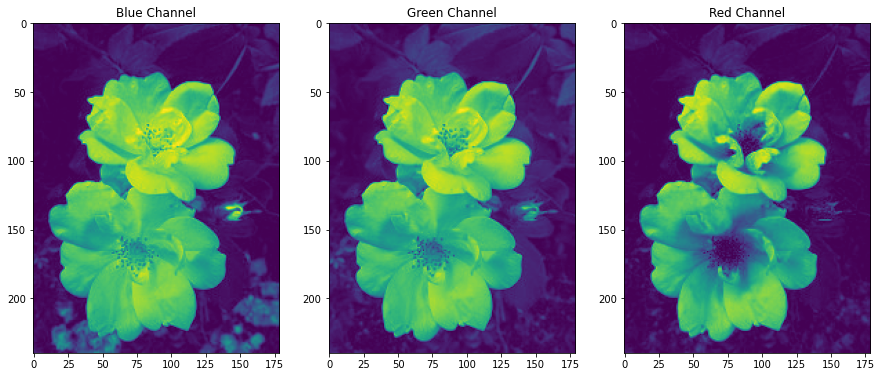

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [5]:
df_blue = blue/255
df_green = green/255
df_red = red/255

### **PCA**

In [6]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


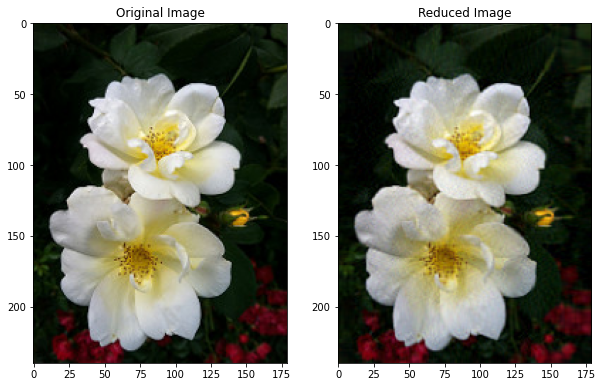

In [7]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

### **SVD**

In [8]:
U_b, sigma_b, V_b = np.linalg.svd(df_blue)
U_g, sigma_g, V_g = np.linalg.svd(df_green)
U_r, sigma_r, V_r = np.linalg.svd(df_red)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


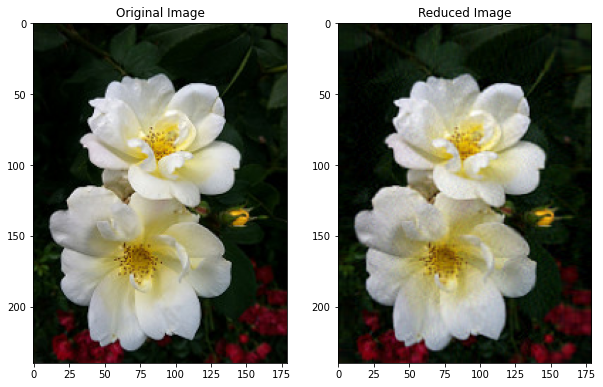

In [9]:
reconstimg_b = np.matrix(U_b[:, :50]) * np.diag(sigma_b[:50]) * np.matrix(V_b[:50, :])
reconstimg_g = np.matrix(U_g[:, :50]) * np.diag(sigma_g[:50]) * np.matrix(V_g[:50, :])
reconstimg_r = np.matrix(U_r[:, :50]) * np.diag(sigma_r[:50]) * np.matrix(V_r[:50 :])

img_reduced = (cv2.merge((reconstimg_b, reconstimg_g, reconstimg_r)))

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

## **LLE, t-SNE, ISOMAP, UMAP, SVD and PCA**

In [ ]:
from matplotlib import offsetbox
!pip install umap-learn
from umap import UMAP
from time import time

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    start_time = time()
    proj = model.fit_transform(data)
    print('Training time = %.2f seconds' % (time() - start_time))
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

###**Isomap**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


Training time = 43.29 seconds


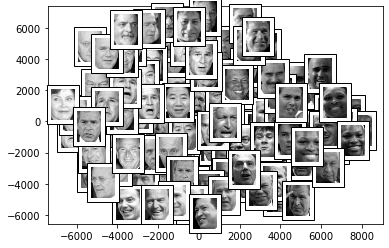

In [12]:
from sklearn.manifold import Isomap

plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from left to right

###**LLE**

Training time = 41.96 seconds


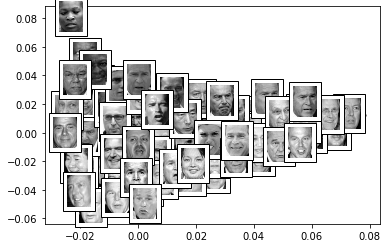

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

plot_components(faces.data,
                model=LocallyLinearEmbedding(n_components=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from top to bottom

###**TSNE**

Training time = 63.03 seconds


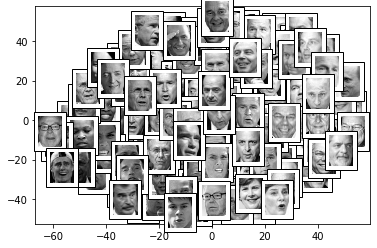

In [14]:
from sklearn.manifold import TSNE

plot_components(faces.data,
                model=TSNE(n_components=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from top left to right bottom

###**Umap**

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Training time = 21.86 seconds


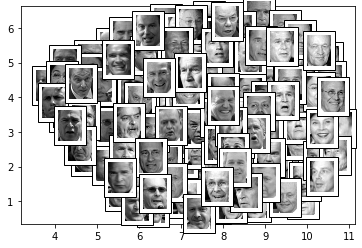

In [15]:
plot_components(faces.data,
                model=UMAP(random_state=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from right to left

###**PCA**

Training time = 0.40 seconds


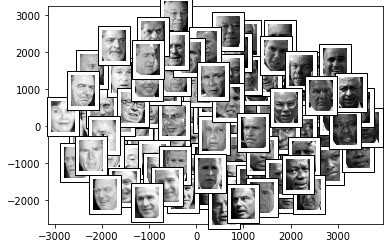

In [16]:
plot_components(faces.data,
                model=PCA(n_components=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from left to right. Its result looks as same as the result from Isomap, but PCA took only 0.39 seconds while Isomap took more than 40 seconds

###**SVD**

Training time = 0.31 seconds


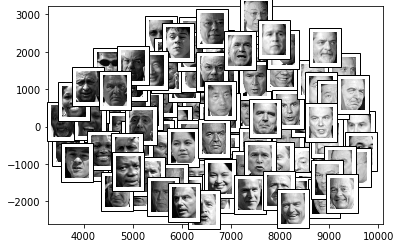

In [17]:
from sklearn.decomposition import TruncatedSVD

plot_components(faces.data,
                model=TruncatedSVD(n_components=2),
                images=faces.images[:, ::2, ::2])

We can see that the images are listed from lighter color to darker color with the direction from right to left. Its result looks as same as the result from Umap, but SVD took only 0.26 seconds while Umap took more than 20 seconds. It is the fastest training model compares to Isomap, LLE, t-SNE, PCA and Umap

#**Tabular dataset**

## **LLE, t-SNE, ISOMAP, UMAP, SVD and PCA**

In [18]:
from sklearn import manifold, datasets, decomposition
from matplotlib import ticker

np.random.seed(0)
X, color = datasets.make_s_curve(1100)
X[:, 1] -= 1
X[:, 1] *= 1.5
X[:, 2] *= 0.5

In [19]:
#PCA
pca = PCA(n_components=2)
start_time = time()
Y_pca = pca.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 0.01 seconds


In [20]:
#LLE
lle = LocallyLinearEmbedding(n_neighbors = 10, n_components=2, method='modified', random_state=0, eigen_solver='dense')
start_time = time()
Y_lle = lle.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 0.62 seconds


In [21]:
#Isomap
iso = Isomap(n_neighbors = 10, n_components=2)
start_time = time()
Y_iso = iso.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 0.68 seconds


In [22]:
#t-SNE
tsne = TSNE(n_components=2)
start_time = time()
Y_tsne = tsne.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 6.66 seconds


In [23]:
#SVD
svd = TruncatedSVD(n_components=2)
start_time = time()
Y_svd = svd.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 0.01 seconds


In [24]:
#Umap
umap = UMAP(random_state=2)
start_time = time()
Y_umap = umap.fit_transform(X)
print('Training time = %.2f seconds' % (time() - start_time))

Training time = 4.70 seconds


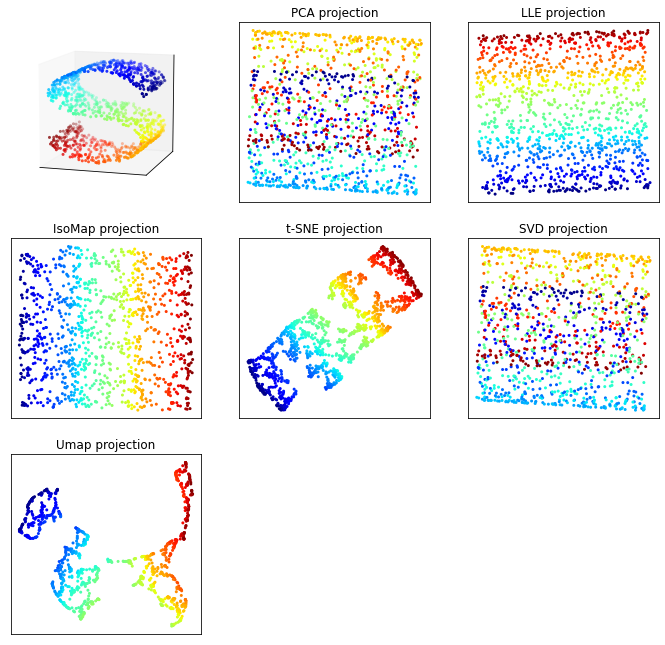

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)

ax = fig.add_subplot(331, projection='3d', xticks=[], yticks=[], zticks=[])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet, s=9, lw=0)
ax.view_init(11, -73)

subplots = [332, 333, 334, 335, 336, 337]
titles = ['PCA projection', 'LLE projection', 'IsoMap projection', 't-SNE projection', 'SVD projection', 'Umap projection']
Yvals = [Y_pca, Y_lle, Y_iso, Y_tsne, Y_svd, Y_umap]

for (Y, title, subplot) in zip(Yvals, titles, subplots):
    ax = fig.add_subplot(subplot)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet, s=9, lw=0)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()